In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

import statsmodels as sm
import warnings

In [2]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
plt.style.use('ggplot')

bins=200

## Fit any function

In [3]:
def func(x, a, b, c, d, e):
    return a * pow(x,3) + b * pow(x, 2) + c * x + d#+ np.exp(d * x) + e

In [4]:
# Load data from statsmodels datasets
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

In [18]:
y, x = np.histogram(data, bins=bins, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
#x = [0] + x + [0]
#y = [y[0]-1] + y + [y[-1]+1]

In [6]:
popt, pcov = curve_fit(func, x, y)
popt

/opt/conda/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([ 5.71508171e-04, -4.56569576e-02,  1.18469861e+00, -9.89749330e+00,
        1.00000000e+00])

/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Frequency')

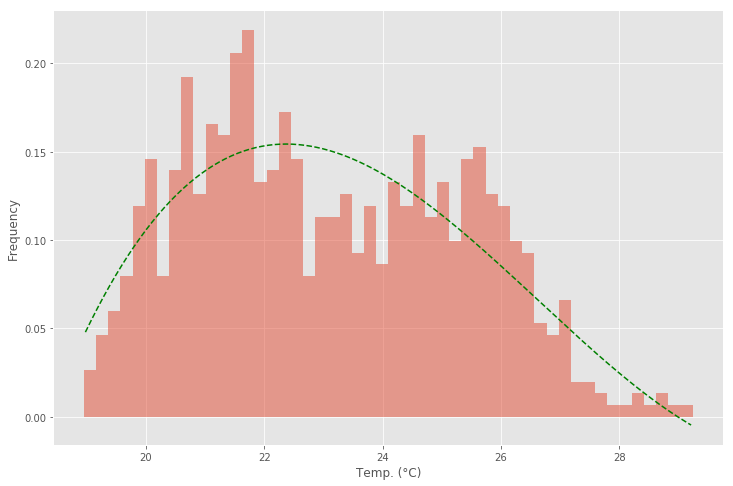

In [7]:
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5)
plt.plot(x, func(x, *popt), 'g--')
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

## Fit a polynomial function

In [19]:
print("Polynomial_degree", "Error")
min_error = 1
selected_order = 1
for order in range(1,30):
    with warnings.catch_warnings():
        warnings.simplefilter("error")
        try:
            z = np.polyfit(x, y, order)
        except:
            break
        err = np.sum((np.polyval(z, x) - y)**2)
        if err < min_error:
            min_error = err
            selected_order = order
        print(order, err)

Polynomial_degree Error
1 0.8165297811133885
2 0.5813272185625179
3 0.5536415685039231
4 0.542505534554848
5 0.4954914188199274
6 0.48467011834495943
7 0.4621521486680896
8 0.45628250937021986
9 0.45207053632708694
10 0.45161833868016926


In [17]:
print(selected_order, min_error)
print(z)

10 0.45161842065689245
[ 9.61529762e-08 -2.24134438e-05  2.34009601e-03 -1.44086798e-01
  5.79339946e+00 -1.58917849e+02  3.01140663e+03 -3.89186112e+04
  3.28233962e+05 -1.63097142e+06  3.62494261e+06]


In [21]:
f = np.poly1d(z)
xp = np.linspace(x[0], x[-1], bins)

/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Frequency')

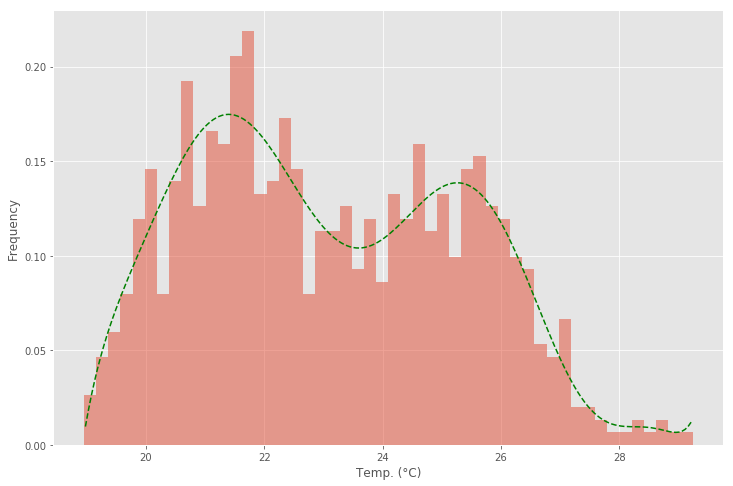

In [22]:
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5)
plt.plot(xp, f(xp), 'g--')
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')